In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import numpy as np
import sys
import pandas as pd
import pickle
from scipy import stats


from Doublet_Quantifier.curvefit import *
from Doublet_Quantifier.models import *



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
mypath = '/Users/allybaldelli/Desktop/AMNH-stuff/quantifying_clouds_ally/'
sys.path.append(mypath)
from functions.plotting_tools import *

In [3]:
temp = 1600

with open(mypath + "/diamondback-data/pickle_files/convolved_data/t"+ str(temp) + "_convolve_data_dict.pkl", "rb") as f:
    convolve_data_dict = pickle.load(f)


In [4]:
(convolve_data_dict).keys()

dict_keys(['316 f8', '31 f8', '316 nc', '31 nc', '316 f1', '31 f1', '31 f2', '316 f3', '31 f3', '316 f2', '316 f4', '31 f4', '3160 f1', '100 f1', '1000 f1', '1000 f2', '100 f2', '3160 f3', '1000 f3', '3160 f2', '100 f3', '3160 f4', '1000 f4', '100 f4', '3160 f8', '100 f8', '1000 f8', '3160 nc', '1000 nc', '100 nc'])

In [5]:
examples = ["316 f8", "31 f8", "31 f1", "316 f1"]

fig = plt.figure(figsize=(7.5, 4))

#two_pseudo_voigts(spec_section[0], nu1_fit_p, nu2_fit_p, A1_fit_p, A2_fit_p, sigma1_fit_p, sigma2_fit_p, mu1_fit_p, mu2_fit_p)

<Figure size 750x400 with 0 Axes>

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
curve fit: nu1, nu2 A1, A2, σ1, σ2, μ1, μ2:  [ 2.50857345e-19  7.59820969e-20 -1.87052442e+11 -2.04682568e+11
  1.13711289e-03  1.79822320e-03  1.16929865e+00  1.17754812e+00]


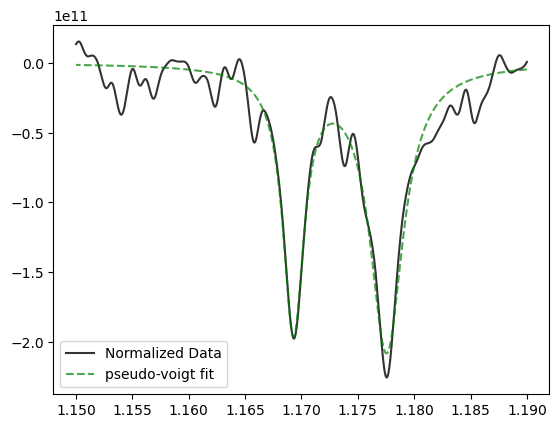

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
curve fit: nu1, nu2 A1, A2, σ1, σ2, μ1, μ2:  [ 2.54223356e-01  5.00000000e-13 -1.36840540e+11 -1.52840120e+11
  8.25447941e-04  1.27373103e-03  1.16931058e+00  1.17748628e+00]


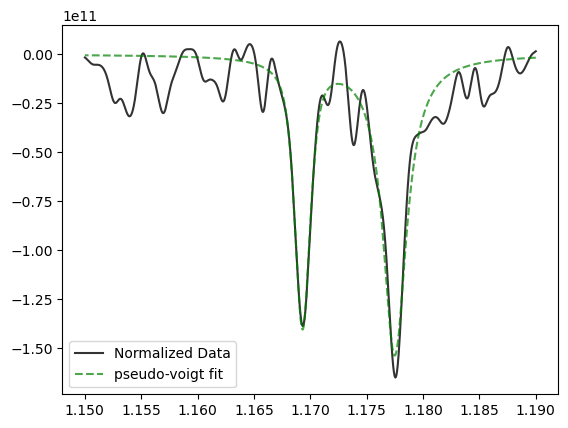

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
curve fit: nu1, nu2 A1, A2, σ1, σ2, μ1, μ2:  [ 4.10466000e-01  5.00000000e-13 -1.09961544e+11 -1.23941799e+11
  8.16845176e-04  1.23460123e-03  1.16931456e+00  1.17748897e+00]


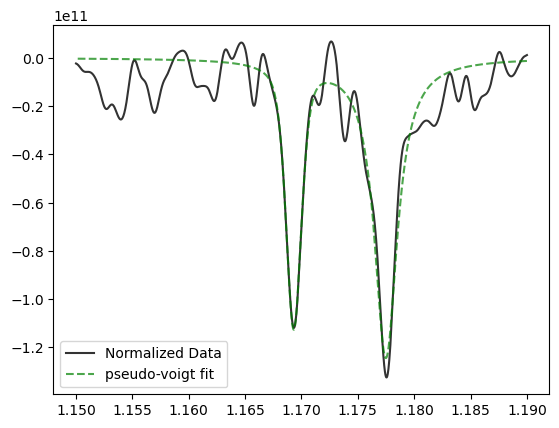

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
curve fit: nu1, nu2 A1, A2, σ1, σ2, μ1, μ2:  [ 4.09413548e-19  6.66783700e-20 -1.00559329e+11 -1.10944017e+11
  1.06254238e-03  1.67290513e-03  1.16930908e+00  1.17754853e+00]


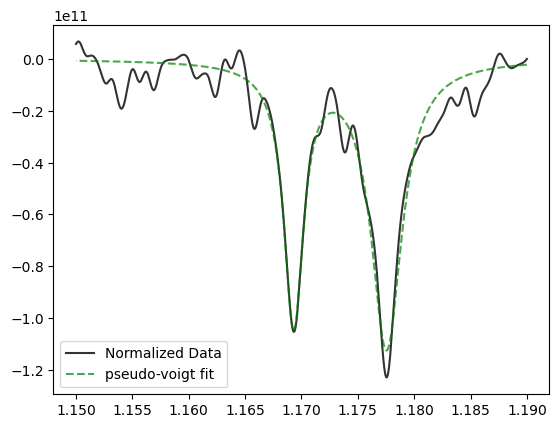

In [6]:
continuum_region = [1.15, 1.19]
absorption_region = [1.165, 1.183]
params = np.zeros((len(examples), 10))

for index, example in enumerate(examples):
    spec_section = convolve_data_dict[example]
    x = convolve_data_dict[example]
    cont_parameters, params_p, params_sd_p = fit_two_curves(spec_section, continuum_region, absorption_region, 
                                                                function='pseudo-voigt',
                                                                show=True, bin_size=500)
    params[index, :8] = params_p
    params[index, 8:] = cont_parameters[:2]
    plt.show()


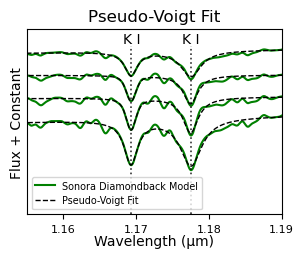

In [13]:
fig = plt.figure(figsize=(3.8, 2.4))
gs = fig.add_gridspec(1, 1)
continuum_region = [1.15, 1.19]
absorption_region = [1.165, 1.183]
y_min, y_max = -4, 4

gs = fig.add_gridspec(1, 2, width_ratios=[1, 0.05])


ax = fig.add_subplot(gs[0, 0])
spacing = [0, 1, 2, 3]
norm_scaling = 1e11

index = 0
example = examples[index]

spec_section = convolve_data_dict[example]
norm = (spec_section[1, :]) / norm_scaling
left_index = np.where(np.isclose(spec_section[0, :], 1.16))[0][0]
const = - norm[left_index] + spacing[index]
ax.plot(spec_section[0], norm + const, label= "Sonora Diamondback Model", color = "green")

x = spec_section[0]
nu1, nu2, A1, A2, FWHM1, FWHM2, mu1, mu2, m, b = params[index, :]
p_fit = b + (m*x)
p_fit += two_pseudo_voigts(x, nu1, nu2, A1, A2, FWHM1, FWHM2, mu1, mu2)

ax.plot(x, (p_fit/norm_scaling) + const, color='black', linestyle='--', linewidth=1, label="Pseudo-Voigt Fit")

x = spec_section[0]
nu1, nu2, A1, A2, FWHM1, FWHM2, mu1, mu2, m, b = params[index, :]
p_fit = b + (m*x)
p_fit += two_pseudo_voigts(x, nu1, nu2, A1, A2, FWHM1, FWHM2, mu1, mu2)

for index, example in enumerate(examples[1:]):
    spec_section = convolve_data_dict[example]
    norm = (spec_section[1, :]) / norm_scaling
    left_index = np.where(np.isclose(spec_section[0, :], 1.16))[0][0]
    const = - norm[left_index] + spacing[index+1]
    ax.plot(spec_section[0], norm + const, color = "green")


    x = spec_section[0]
    nu1, nu2, A1, A2, FWHM1, FWHM2, mu1, mu2, m, b = params[index+1, :]
    p_fit = b + (m*x)
    p_fit += two_pseudo_voigts(x, nu1, nu2, A1, A2, FWHM1, FWHM2, mu1, mu2)
    
    ax.plot(x, (p_fit/norm_scaling) + const, color='black', linestyle='--', linewidth=1)


ax.set_xlim(1.155, 1.19)
ax.set_ylim(y_min, y_max )
ax.set_xlabel("Wavelength (µm)", fontsize=10, labelpad=0)
ax.set_ylabel("Flux + Constant", fontsize=10, labelpad=2)
ax.legend(fontsize='x-small')

ax.set_xticks([1.16,  1.17, 1.18, 1.19])  # Set the positions of the x-ticks
ax.set_xticklabels(['1.16','1.17', '1.18', '1.19'], fontsize= 8)
ax.set_yticks([])  # Remove y-ticks

potassium_lines = [1.16935, 1.1775, 1.2435, 1.2525]
ax.vlines(potassium_lines, ymin=y_min, ymax= 3.3 ,
        linestyle='dotted', color='k', linewidth=1.2, alpha=.8)
for k in potassium_lines:
    ax.annotate("K I", xy=(k, 3.3),
                ha='center', va='bottom',
                xycoords='data', color='k', fontsize=10)
    
ax.set_title(r"Pseudo-Voigt Fit", fontsize=12)
fig.savefig('/Users/allybaldelli/Desktop/AMNH-stuff/quantifying_clouds_ally/plots/example_pV.pdf',
             bbox_inches='tight', pad_inches=0.04)